In [2]:
library(Allspice)
packageVersion("Allspice")

[1] ‘1.0.7’

In [4]:
# example.txt 파일을 읽어들입니다.
data <- read.table("/bce/groups/pnucolab/analysis/Bohun_Ranking_Pathway/Bohun_Shares/Expression_Profile_240507.txt", header = TRUE, sep = "\t", stringsAsFactors = FALSE)

# 필요한 열만 선택하여 새로운 데이터 프레임을 만듭니다.
selected_data <- data[, c("Gene_Symbol", "R1_Read_Count", "R2_Read_Count", "R4_Read_Count")]

# 데이터 출력
head(selected_data)

,Gene_Symbol,R1_Read_Count,R2_Read_Count,R4_Read_Count
,<chr>,<int>,<int>,<int>
1,A1BG,1295,252,353
2,A2M,587,1128,1977
3,A2MP1,0,14,0
4,NAT1,589,651,927
5,NAT2,0,2,0
6,SERPINA3,0,0,0


In [5]:
# 예제 데이터에서 숫자형으로 변환 후 행렬 전치
numeric_data <- as.matrix(selected_data[,2:ncol(selected_data)])
print(numeric_data)

         R1_Read_Count R2_Read_Count R4_Read_Count
    [1,]          1295           252           353
    [2,]           587          1128          1977
    [3,]             0            14             0
    [4,]           589           651           927
    [5,]             0             2             0
    [6,]             0             0             0
    [7,]             0             0             0
    [8,]          3992          2460          4644
    [9,]            16             2             0
   [10,]          3675          4758          9976
   [11,]           433           546           649
   [12,]         27859          2298          6907
   [13,]          2497          1604           743
   [14,]           311            28            78
   [15,]          4961          2239          4154
   [16,]          2214          2594          2673
   [17,]            20            26           788
   [18,]          1488          4795          1452
   [19,]             0         

In [6]:
# 행렬의 모든 요소를 정수로 변환
integer_matrix <- matrix(as.double(numeric_data), nrow = nrow(numeric_data), 
                         ncol = ncol(numeric_data))

rownames(integer_matrix) <- selected_data$Gene_Symbol
colnames(integer_matrix) <- colnames(numeric_data)
print(integer_matrix)

                          R1_Read_Count R2_Read_Count R4_Read_Count
A1BG                               1295           252           353
A2M                                 587          1128          1977
A2MP1                                 0            14             0
NAT1                                589           651           927
NAT2                                  0             2             0
SERPINA3                              0             0             0
AADAC                                 0             0             0
AAMP                               3992          2460          4644
AANAT                                16             2             0
AARS1                              3675          4758          9976
ABAT                                433           546           649
ABCA1                             27859          2298          6907
ABCA2                              2497          1604           743
ABCA3                               311         

In [7]:
integer_matrix

,R1_Read_Count,R2_Read_Count,R4_Read_Count
A1BG,1295,252,353
A2M,587,1128,1977
A2MP1,0,14,0
NAT1,589,651,927
NAT2,0,2,0
SERPINA3,0,0,0
AADAC,0,0,0
AAMP,3992,2460,4644
AANAT,16,2,0
AARS1,3675,4758,9976


In [8]:
typeof(integer_matrix)

[1] "double"

In [9]:
# Set up a classifier for genetic B-cell ALL subtypes.
cls <- classifier()


ALL subtype
    configuration -> 164 bytes
    categories -> 984 bytes
    reference -> 335,109 bytes
    covariates -> 103 bytes
    nomenclature -> 325,618 bytes
    centroids -> 15,212 bytes
    coefficients -> 3,150 bytes

Driver genes
    configuration -> 165 bytes
    categories -> 1,461 bytes
    reference -> 333,812 bytes
    covariates -> 102 bytes
    nomenclature -> 324,271 bytes
    centroids -> 22,764 bytes
    coefficients -> 4,796 bytes

Source tissue
    configuration -> 166 bytes
    categories -> 2,619 bytes
    reference -> 251,540 bytes
    covariates -> 105 bytes
    nomenclature -> 242,601 bytes
    centroids -> 42,622 bytes
    coefficients -> 9,144 bytes


In [10]:
# Load RNA-seq profiles.
profiles(cls) <- integer_matrix

Warning message:
“Asset.normalize(): 3078 / 5808 variables imputed from reference.”
Warning message:
“Asset.standardize(): 19 / 45 usable variables.”
Warning message:
“Asset.normalize(): 3070 / 5785 variables imputed from reference.”
Warning message:
“Asset.standardize(): 31 / 45 usable variables.”
Warning message:
“Asset.normalize(): 2305 / 4380 variables imputed from reference.”
Warning message:
“Asset.standardize(): 22 / 45 usable variables.”
Warning message:
“Classifier.profiles(): Incomplete covariates.”


In [12]:
# Prediction results.
pred <- predictions(cls)
primary <- pred[[1]]
print(primary[1:3,c("LABEL","FREQ","PROX","EXCL")])

                  LABEL      FREQ      PROX      EXCL
R1_Read_Count Ambiguous 0.7569777 0.9568267 0.4752882
R2_Read_Count Ambiguous 0.5387591 0.9500853 0.3985365
R4_Read_Count Ambiguous 0.7473185 0.9351565 0.4632419


In [14]:
# Prediction results.
ambig <- which(primary$CATEG == "Ambiguous")
uncla <- which(primary$CATEG == "Unclassified")
rows <- unique(c(1:3, ambig[1], uncla[1]))
print(primary[rows,c("LABEL","MATCH","FREQ","PROX","EXCL")])

                  LABEL       MATCH      FREQ      PROX      EXCL
R1_Read_Count Ambiguous        DUX4 0.7569777 0.9568267 0.4752882
R2_Read_Count Ambiguous Hypodiploid 0.5387591 0.9500853 0.3985365
R4_Read_Count Ambiguous  ETV6.RUNX1 0.7473185 0.9351565 0.4632419
NA                 <NA>        <NA>        NA        NA        NA


In [15]:
# Access subtype labelling information.
info <- information(cls)
print(info$categories[1:5,c("ASSET","TITLE","CATEG","LABEL")])

  ASSET       TITLE      CATEG       LABEL
1     1 ALL subtype   BCL2_MYC    BCL2/MYC
2     1 ALL subtype  CDX2.high CDX2 hi-exp
3     1 ALL subtype      CRLF2       CRLF2
4     1 ALL subtype       DUX4        DUX4
5     1 ALL subtype ETV6.RUNX1 ETV6::RUNX1


In [16]:
primary

,CATEG,MATCH,MATCH.2nd,FREQ,FREQ.2nd,PROX,PROX.2nd,EXCL,LABEL,COLOR,COLOR.light,COLOR.dark
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
R1_Read_Count,Ambiguous,DUX4,ZNF384,0.7569777,0.3844854,0.9568267,0.8596825,0.4752882,Ambiguous,#888888,#b0b0b0,#404040
R2_Read_Count,Ambiguous,Hypodiploid,Ph,0.5387591,0.5767576,0.9500853,0.8693628,0.3985365,Ambiguous,#888888,#b0b0b0,#404040
R4_Read_Count,Ambiguous,ETV6.RUNX1,Hypodiploid,0.7473185,0.2707683,0.9351565,0.8153044,0.4632419,Ambiguous,#888888,#b0b0b0,#404040


In [17]:
# Select successful classification.
rows <- which((primary$CATEG != "Ambiguous") & (primary$FREQ > 0.9))
print(primary[rows[1],c("LABEL","MATCH","FREQ","PROX","EXCL")])

   LABEL MATCH FREQ PROX EXCL
NA  <NA>  <NA>   NA   NA   NA


In [18]:
# Show patient report.
report(cls, name = rows[1], file = NULL)

ERROR: Error in report(cls, name = rows[1], file = NULL): Unusable name.


In [19]:
# Select ambiguous classification.
rows <- which((primary$CATEG == "Ambiguous") & (primary$PROX > 0.9))
print(primary[rows[1],c("LABEL","MATCH","FREQ","PROX","EXCL")])

                  LABEL MATCH      FREQ      PROX      EXCL
R1_Read_Count Ambiguous  DUX4 0.7569777 0.9568267 0.4752882


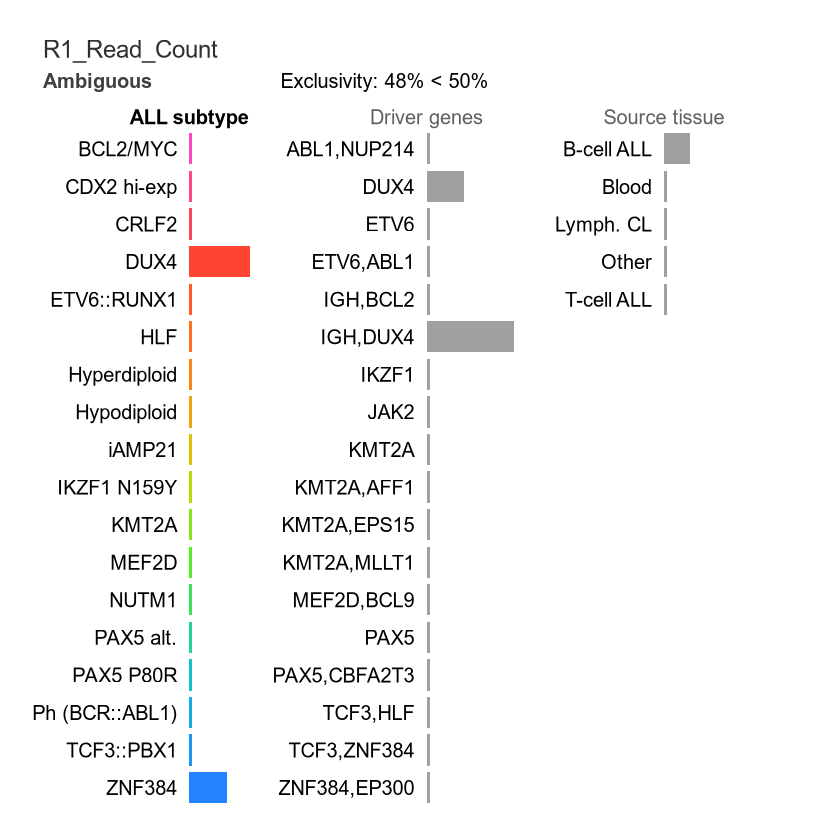

In [20]:
# Show patient report.
report(cls, name = rows[1], file = NULL)

In [21]:
# Select poor quality samples.
rows <- which(primary$CATEG == "Unclassified")
print(primary[rows[1],c("LABEL","MATCH","FREQ","PROX","EXCL")])

   LABEL MATCH FREQ PROX EXCL
NA  <NA>  <NA>   NA   NA   NA
